# Team Notebook - Project Stage II

## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import plotly.express as plt
from IPython.display import Image

## Load Data USA COVID Data

In [29]:
deaths = pd.read_csv("data/covid_deaths_usafacts.csv")
cases = pd.read_csv("data/covid_confirmed_usafacts.csv")

## Display First Few Observations

In [30]:
cases.head(5)


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [31]:
deaths.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


## Data Types of Features

In [32]:
dtypes_cases = pd.DataFrame(cases.dtypes, columns=['dtypes_cases'])
dtypes_deaths = pd.DataFrame(deaths.dtypes, columns=['dtypes_deaths'])

result=pd.concat([dtypes_cases, dtypes_deaths], axis=1)
print(result)

            dtypes_cases dtypes_deaths
countyFIPS         int64         int64
County Name       object        object
State             object        object
StateFIPS          int64         int64
2020-01-22         int64         int64
...                  ...           ...
2023-07-19         int64         int64
2023-07-20         int64         int64
2023-07-21         int64         int64
2023-07-22         int64         int64
2023-07-23         int64         int64

[1269 rows x 2 columns]


## Dropping Rows and Columns
We only want to keep our data, state and county specific details are not necessary since we are aggregating data from the USA as a whole. 

In [33]:
cases = cases[cases['County Name'] != 'Statewide Unallocated']
deaths = deaths[deaths['County Name'] != 'Statewide Unallocated']

In [34]:
# Drop multiple columns named 'countyFIPS', 'StateFIPS','County Name','State' from cases and deaths
cases.drop(columns=['countyFIPS', 'StateFIPS','County Name', 'State'], inplace=True)
deaths.drop(columns=['countyFIPS', 'StateFIPS','County Name','State'], inplace=True)

## Filter Dates from July, 2020 to December, 2020

### Cases

In [35]:

date_columns = cases.columns[1:]  

# Define the date range
# Our start date is earlier than our range so that we can calculate "new cases" later on
start_date ='2020-06-23'
end_date = '2020-12-27'

# Filter columns between the start and end date
filtered_columns = [col for col in date_columns if start_date <= col <= end_date]

# Create a new DataFrame with only the filtered columns
filtered_cases = cases[list(filtered_columns)]

# Display the filtered DataFrame
filtered_cases.head()

,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
1,453,469,479,488,498,503,527,537,553,561,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,450,464,477,515,555,575,643,680,703,751,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,280,288,305,312,317,317,322,325,326,335,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,135,141,149,153,161,162,165,170,174,179,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746
5,159,168,176,184,188,189,199,208,218,222,...,4118,4191,4218,4234,4313,4367,4405,4441,4446,4465


### Deaths

In [36]:
# Filter Dates from July, 2020 to December, 2020
date_columns = deaths.columns[1:]  

# Define the date range
# Our start date is earlier than our range so that we can calculate "new deaths" later on
start_date ='2020-06-23'
end_date = '2020-12-27'

# Filter columns between the start and end date
filtered_columns = [col for col in date_columns if start_date <= col <= end_date]

# Create a new DataFrame with only the filtered columns
filtered_deaths = deaths[list(filtered_columns)]

# Display the filtered DataFrame
filtered_deaths.head()

,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
1,9,11,11,11,12,12,12,12,12,13,...,44,44,44,44,44,46,46,46,46,47
2,9,9,9,9,10,10,10,10,10,10,...,146,147,147,147,149,151,151,151,151,152
3,1,1,1,1,1,1,1,1,1,1,...,30,32,32,32,32,32,32,32,32,32
4,1,1,1,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,42,42
5,1,1,1,1,1,1,1,1,1,1,...,52,54,54,54,54,57,58,58,58,58


## Calculate Weekly Averages from our Daily Data

### Weekly Average Cases - US

In [37]:
weekly_avg_cases = filtered_cases.copy()

date_columns = weekly_avg_cases.columns


# Create a DatetimeIndex based on the date columns
weekly_avg_cases.columns = pd.to_datetime(weekly_avg_cases.columns)

# resample the DataFrame to perform weekly aggregation and convert it into integer value
weekly_cases = weekly_avg_cases.resample('W', axis=1).mean().astype('int')

# Reset the column names to their original format 
weekly_cases.columns = weekly_cases.columns.strftime('%Y-%m-%d')

# Display the weekly aggregated DataFrame
weekly_cases.head()


/tmp/ipykernel_2216/4074189725.py:10: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_cases = weekly_avg_cases.resample('W', axis=1).mean().astype('int')


,2020-06-28,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,2020-08-09,2020-08-16,2020-08-23,2020-08-30,...,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27
1,481,564,662,781,901,1001,1110,1244,1298,1382,...,2027,2122,2231,2382,2552,2698,2899,3161,3560,3924
2,506,766,1114,1619,2379,2990,3439,3822,4041,4318,...,6515,6815,7098,7462,7945,8550,9328,10233,11377,12449
3,303,336,376,454,531,587,620,651,687,738,...,1005,1050,1082,1114,1144,1169,1206,1251,1308,1381
4,150,180,211,249,297,352,412,468,505,534,...,812,861,906,963,1030,1167,1248,1355,1545,1698
5,177,221,282,415,580,731,877,977,1063,1206,...,1888,2017,2216,2442,2670,2867,3161,3547,4028,4381


### Weekly Average Deaths - US

In [38]:
weekly_avg_deaths = filtered_deaths.copy()

date_columns = weekly_avg_deaths.columns


# Create a DatetimeIndex based on the date columns
weekly_avg_deaths.columns = pd.to_datetime(weekly_avg_deaths.columns)

# resample the DataFrame to perform weekly aggregation and convert it into integet value
weekly_deaths = weekly_avg_deaths.resample('W', axis=1).mean().astype('int')

# Reset the column names to their original format 
weekly_deaths.columns = weekly_deaths.columns.strftime('%Y-%m-%d')

# Display the weekly aggregated DataFrame
weekly_deaths.head()


/tmp/ipykernel_2216/3668330121.py:10: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_deaths = weekly_avg_deaths.resample('W', axis=1).mean().astype('int')


,2020-06-28,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,2020-08-09,2020-08-16,2020-08-23,2020-08-30,...,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27
1,11,12,14,19,21,21,21,22,23,23,...,29,30,30,33,38,40,41,41,43,45
2,9,10,11,13,16,20,25,31,33,37,...,68,69,78,83,84,94,131,140,144,150
3,1,1,2,2,4,4,5,5,6,7,...,9,9,9,9,9,10,23,29,30,32
4,1,1,1,1,2,2,4,5,6,6,...,13,14,15,16,17,17,32,39,41,42
5,1,1,1,1,1,2,3,4,5,7,...,24,25,25,31,35,38,43,46,51,56


## Transpose of Dataframes

### Cases

In [39]:
weekly_cases_US = weekly_cases.T
weekly_cases_US.head(5)

,1,2,3,4,5,6,7,8,9,10,...,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192
2020-06-28,481,506,303,150,177,347,591,232,551,64,...,2,24,2,22,5,73,117,162,39,1
2020-07-05,564,766,336,180,221,369,616,306,612,83,...,2,55,3,26,6,94,134,179,39,2
2020-07-12,662,1114,376,211,282,377,644,446,672,116,...,2,77,4,27,6,126,150,196,41,1
2020-07-19,781,1619,454,249,415,390,670,675,731,152,...,2,87,4,36,13,161,181,214,43,3
2020-07-26,901,2379,531,297,580,408,706,957,791,194,...,2,94,4,40,21,203,250,227,44,4


### Deaths

In [40]:
weekly_deaths_US = weekly_deaths.T
weekly_deaths_US.head(5)

,1,2,3,4,5,6,7,8,9,10,...,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192
2020-06-28,11,9,1,1,1,10,27,5,27,7,...,0,0,0,0,0,0,1,0,5,0
2020-07-05,12,10,1,1,1,10,27,5,27,7,...,0,0,0,0,0,0,1,0,5,0
2020-07-12,14,11,2,1,1,11,28,5,27,7,...,0,0,0,0,0,0,1,0,5,0
2020-07-19,19,13,2,1,1,11,31,5,32,7,...,0,0,0,0,0,1,1,0,5,0
2020-07-26,21,16,4,2,1,11,34,6,35,7,...,0,0,0,0,0,2,1,0,5,0


## Calculate Totals Cases Across US
We now have data for every county at weekly intervals across the US. We want to add up all the state totals to get the totals by week for the entire Country.

In [41]:
cases_US=weekly_cases_US.sum(axis=1)
cases_US

2020-06-28     2480211
2020-07-05     2787666
2020-07-12     3174438
2020-07-19     3627143
2020-07-26     4082934
2020-08-02     4511199
2020-08-09     4892381
2020-08-16     5232221
2020-08-23     5532070
2020-08-30     5814351
2020-09-06     6093061
2020-09-13     6339090
2020-09-20     6605556
2020-09-27     6903428
2020-10-04     7201375
2020-10-11     7523287
2020-10-18     7898669
2020-10-25     8331280
2020-11-01     8866415
2020-11-08     9608717
2020-11-15    10554236
2020-11-22    11696752
2020-11-29    12896988
2020-12-06    14164247
2020-12-13    15645051
2020-12-20    17139811
2020-12-27    18446012
dtype: int64

## Weekly Total Deaths across US

In [42]:
deaths_US=weekly_deaths_US.sum(axis=1)
deaths_US

2020-06-28    122768
2020-07-05    128398
2020-07-12    133727
2020-07-19    139959
2020-07-26    146899
2020-08-02    154314
2020-08-09    161802
2020-08-16    169073
2020-08-23    175705
2020-08-30    181878
2020-09-06    187546
2020-09-13    192345
2020-09-20    197411
2020-09-27    202226
2020-10-04    206797
2020-10-11    211393
2020-10-18    216205
2020-10-25    221617
2020-11-01    227414
2020-11-08    234116
2020-11-15    242064
2020-11-22    251623
2020-11-29    263141
2020-12-06    276331
2020-12-13    292990
2020-12-20    311883
2020-12-27    329871
dtype: int64

## Combine our Data into One Dataframe

In [43]:
# Combine case and death data
weekly_avg_US = pd.concat([cases_US, deaths_US], axis=1, keys=['total_cases', 'total_deaths'])

# Redefine our index
weekly_avg_US['date'] = weekly_avg_US.index
weekly_avg_US.reset_index(drop=True, inplace=True)

# Add a country column to prepare for merging with the other country data later
weekly_avg_US['country'] = 'United States'
weekly_avg_US = weekly_avg_US[['date','country','total_cases','total_deaths']]
# Display the DataFrame
weekly_avg_US


,date,country,total_cases,total_deaths
0,2020-06-28,United States,2480211,122768
1,2020-07-05,United States,2787666,128398
2,2020-07-12,United States,3174438,133727
3,2020-07-19,United States,3627143,139959
4,2020-07-26,United States,4082934,146899
5,2020-08-02,United States,4511199,154314
6,2020-08-09,United States,4892381,161802
7,2020-08-16,United States,5232221,169073
8,2020-08-23,United States,5532070,175705
9,2020-08-30,United States,5814351,181878


### Calculate New Cases and New Deaths
We have our total cases and total deaths, but having our number of new cases and new deaths per week will give us more insight into the trends of the spread.

In [45]:
weekly_avg_US["new_cases"] = weekly_avg_US['total_cases'].diff()
weekly_avg_US["new_deaths"] = weekly_avg_US['total_deaths'].diff()
weekly_avg_US.head(50)

# Convert DataFrame to CSV
weekly_avg_US.to_csv('data/weekly_avg_us', index=False)


In [25]:
# The first row was used to calculate new cases and the last row date falls beyond 2023 so they are no longer needed
weekly_avg_US.drop(index=0)


### Weekly Statistics for Number of Cases and Number of Deaths Across US

In [21]:
weekly_avg_US.describe().astype('int')

,total_cases,total_deaths,new_cases,new_deaths
count,27,27,26,26
mean,8075873,206648,614069,7965
std,4397228,55974,424329,4193
min,2480211,122768,246029,4571
25%,5062301,165437,301750,5349
50%,6903428,202226,407518,6432
75%,10081476,238090,894714,7833
max,18446012,329871,1494760,18893


### Important Data and initial insights:
We can see that over our date range in the US, there were an average of 614,069 new confirmed cases per week, and an average of 7,965 deaths per week. <br><br>
Median New Cases per week was 407,518 - The average is roughly 50% higher, pointing to the posibility of some outlier weeks in which cases spiked more than usual. 

## COVID Data from Other Countries

In [20]:
# Source: https://ourworldindata.org/coronavirus-source-data
data = pd.read_csv("data/countriesCovidData.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Select Five Countries
We chose the following countries based on their population being relatively close to that of the United States:
- United States, Population = 336,997,632
- Indonesia, Population = 273,753,184
- Pakistan, Population = 231,402,112
- Nigeria, Population = 213,401,328
- Bangladesh, Population = 169,356,240
- Russia, Population = 145,102,752

In [21]:
locations = ['Indonesia', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia']

data =data[data['location'].isin(locations)]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24562,BGD,Asia,Bangladesh,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.80,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24563,BGD,Asia,Bangladesh,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.80,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24564,BGD,Asia,Bangladesh,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.80,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24565,BGD,Asia,Bangladesh,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.80,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24566,BGD,Asia,Bangladesh,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.80,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,RUS,Europe,Russia,2023-09-23,23014969.0,0.0,1645.143,400023.0,0.0,2.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
253674,RUS,Europe,Russia,2023-09-24,23014969.0,0.0,0.000,400023.0,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
253675,RUS,Europe,Russia,2023-09-25,23014969.0,0.0,0.000,400023.0,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
253676,RUS,Europe,Russia,2023-09-26,23014969.0,0.0,0.000,400023.0,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


## Select Relevant Columns

In [22]:
data1= data[['date','location','total_cases','total_deaths' ]]
data1

,date,location,total_cases,total_deaths
24562,2020-01-03,Bangladesh,NaN,NaN
24563,2020-01-04,Bangladesh,NaN,NaN
24564,2020-01-05,Bangladesh,NaN,NaN
24565,2020-01-06,Bangladesh,NaN,NaN
24566,2020-01-07,Bangladesh,NaN,NaN
...,...,...,...,...
253673,2023-09-23,Russia,23014969.0,400023.0
253674,2023-09-24,Russia,23014969.0,400023.0
253675,2023-09-25,Russia,23014969.0,400023.0
253676,2023-09-26,Russia,23014969.0,400023.0


### Changing Column Name 'location' to 'country'
to match our US dataframe

In [23]:
data2 = data1.copy()
data2.rename(columns={'location': 'country'}, inplace=True)

### Filter Dates from July, 2020 to December, 2020

In [24]:
# Define the date range
data_countries=data2.copy()
data_countries['date'] = pd.to_datetime(data_countries['date'])

start_date = '2020-06-23'
end_date = '2020-12-27'

# Use boolean indexing to filter the DataFrame
data_countries = data_countries[(data_countries['date'] >= start_date) & (data_countries['date'] <= end_date)]

# Display the filtered DataFrame
data_countries

,date,country,total_cases,total_deaths
24734,2020-06-23,Bangladesh,119198.0,1545.0
24735,2020-06-24,Bangladesh,122660.0,1582.0
24736,2020-06-25,Bangladesh,126606.0,1621.0
24737,2020-06-26,Bangladesh,130474.0,1661.0
24738,2020-06-27,Bangladesh,133978.0,1695.0
...,...,...,...,...
252669,2020-12-23,Russia,2933753.0,52461.0
252670,2020-12-24,Russia,2963688.0,53096.0
252671,2020-12-25,Russia,2992706.0,53659.0
252672,2020-12-26,Russia,3021964.0,54226.0


### Weekly Average in 5 Countries

In [25]:
# Group by "country" and "date" and calculate daily cases and deaths
# and reset the index
weekly_cases_deaths = data_countries.groupby(['country', 'date']).agg({
   'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

In [26]:
weekly_cases_deaths

,country,date,total_cases,total_deaths
0,Bangladesh,2020-06-23,119198.0,1545.0
1,Bangladesh,2020-06-24,122660.0,1582.0
2,Bangladesh,2020-06-25,126606.0,1621.0
3,Bangladesh,2020-06-26,130474.0,1661.0
4,Bangladesh,2020-06-27,133978.0,1695.0
...,...,...,...,...
935,Russia,2020-12-23,2933753.0,52461.0
936,Russia,2020-12-24,2963688.0,53096.0
937,Russia,2020-12-25,2992706.0,53659.0
938,Russia,2020-12-26,3021964.0,54226.0


In [27]:
# Convert the "date" column to datetime within each group
weekly_cases_deaths['date'] = pd.to_datetime(weekly_cases_deaths['date'])

# Set "date" as the index within each group
weekly_cases_deaths.set_index('date', inplace=True)

# Resample to weekly frequency and calculate the average of cases and deaths for each week
weekly_cases_deaths = weekly_cases_deaths.groupby('country').resample('W').mean().reset_index()

# Print the resulting DataFrame
weekly_cases_deaths


,country,date,total_cases,total_deaths
0,Bangladesh,2020-06-28,1.284505e+05,1640.333333
1,Bangladesh,2020-07-05,1.526151e+05,1923.000000
2,Bangladesh,2020-07-12,1.750369e+05,2230.571429
3,Bangladesh,2020-07-19,1.961160e+05,2502.000000
4,Bangladesh,2020-07-26,2.158023e+05,2795.285714
...,...,...,...,...
130,Russia,2020-11-29,2.190186e+06,38046.285714
131,Russia,2020-12-06,2.376587e+06,41574.285714
132,Russia,2020-12-13,2.570248e+06,45291.571429
133,Russia,2020-12-20,2.763621e+06,49148.714286


In [28]:
# Convert to ints
weekly_cases_deaths['total_cases'] = weekly_cases_deaths['total_cases'].astype(int)
weekly_cases_deaths['total_deaths'] = weekly_cases_deaths['total_deaths'].astype(int)

In [29]:
# Calculate new weekly cases from total cases
weekly_cases_deaths['new_cases'] = weekly_cases_deaths.groupby('country')['total_cases'].diff()
# Calculate new weekly deaths from total deaths
weekly_cases_deaths['new_deaths'] = weekly_cases_deaths.groupby('country')['total_deaths'].diff()
weekly_cases_deaths

,country,date,total_cases,total_deaths,new_cases,new_deaths
0,Bangladesh,2020-06-28,128450,1640,NaN,NaN
1,Bangladesh,2020-07-05,152615,1923,24165.0,283.0
2,Bangladesh,2020-07-12,175036,2230,22421.0,307.0
3,Bangladesh,2020-07-19,196116,2502,21080.0,272.0
4,Bangladesh,2020-07-26,215802,2795,19686.0,293.0
...,...,...,...,...,...,...
130,Russia,2020-11-29,2190186,38046,172869.0,3200.0
131,Russia,2020-12-06,2376586,41574,186400.0,3528.0
132,Russia,2020-12-13,2570247,45291,193661.0,3717.0
133,Russia,2020-12-20,2763621,49148,193374.0,3857.0


In [36]:
# Drop final remaining row outside of our date ranges
weekly_cases_deaths = weekly_cases_deaths.drop(weekly_cases_deaths[weekly_cases_deaths['date'] == '2020-06-28'].index)
# Convert to ints
weekly_cases_deaths['new_cases'] = weekly_cases_deaths['new_cases'].astype(int)
weekly_cases_deaths['new_deaths'] = weekly_cases_deaths['new_deaths'].astype(int)
weekly_cases_deaths
country_data = weekly_cases_deaths.copy()
csv_file_path = 'country_data.csv'
country_data.to_csv(csv_file_path, index=False)


## Merge Country Data with US Date

In [33]:
weekly_cases_deaths[['total_cases', 'total_deaths']] = weekly_cases_deaths[['total_cases', 'total_deaths']] .astype(int)
weekly_cases_deaths[['new_cases', 'new_deaths']] = weekly_cases_deaths[['new_cases', 'new_deaths']] .astype(int)
# Merge the DataFrames on the "date" column
merged_df = pd.concat([weekly_avg_US, weekly_cases_deaths], axis=0)
# Ensure date column items all have the same data type
merged_df['date'] = pd.to_datetime(merged_df['date'].astype(str), format='%Y-%m-%d')
# Drop rows outside of our date range
merged_df = merged_df.dropna()
# Reset the index if needed
merged_df = merged_df.reset_index(drop=True)
merged_df[['new_cases', 'new_deaths']] = merged_df[['new_cases', 'new_deaths']].astype(int)
merged_df

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:00", at position 27. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## Get Initial Information by Country
Get averages and medians for our data by country over our date range

In [ ]:
merged_grouped = merged_df.groupby('country')
merged_grouped.mean().astype('int')

,total_cases,total_deaths,new_cases,new_deaths
country,,,,
Bangladesh,348410,4901,14516,220
Indonesia,306733,10712,24683,691
Nigeria,55802,1036,2250,26
Pakistan,322552,6679,10485,221
Russia,1424040,24580,90252,1705
United States,8291091,209874,614069,7965


In [ ]:
merged_grouped.median().astype('int')

,total_cases,total_deaths,new_cases,new_deaths
country,,,,
Bangladesh,359965,5171,13990,224
Indonesia,276622,10453,25701,672
Nigeria,58272,1106,1327,19
Pakistan,309871,6456,6408,117
Russia,1157898,20408,51365,1123
United States,7052401,204511,407518,6432


## Plot Data - Cumulative Cases and Deaths

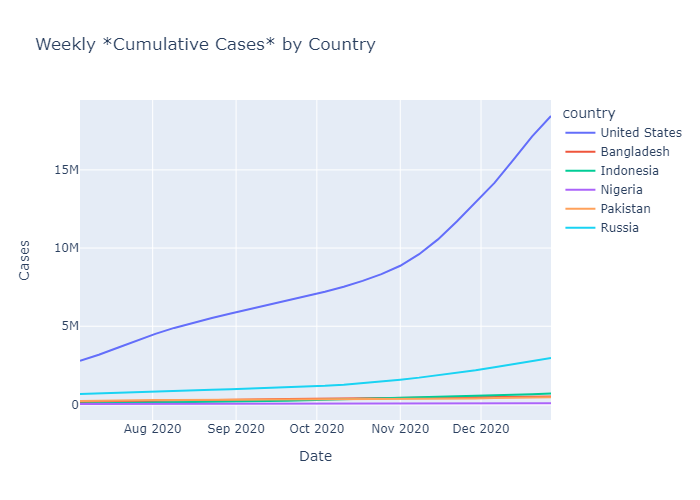

In [ ]:
# Create line plots for CUMULATIVE cases and deaths for each country
fig = plt.line(merged_df, x='date', y='total_cases', color='country',
              labels={'date': 'Date', 'total_cases': 'Cases'},
              title='Weekly *Cumulative Cases* by Country')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

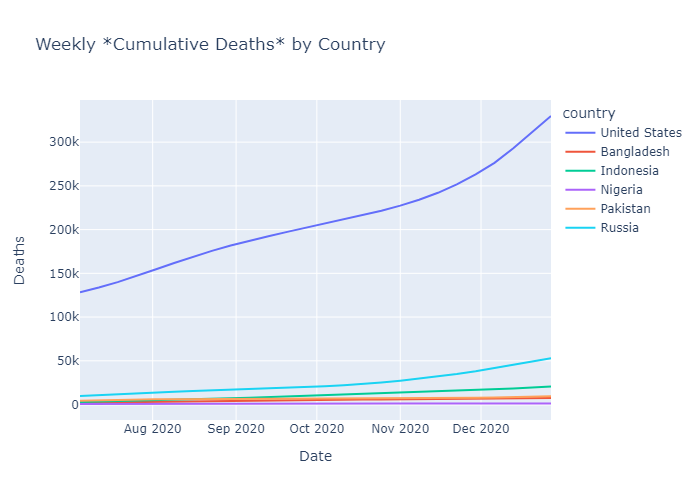

In [ ]:
fig = plt.line(merged_df, x='date', y='total_deaths', color='country',
              labels={'date': 'Date', 'total_deaths': ' Deaths'},
              title='Weekly *Cumulative Deaths* by Country')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

#### A good start, but not very informative.

We can see that, looking at raw cumulative data, the US has much higher numbers of cases and deaths than the other countries. Since the data is only cumulative, and the US has much higher raw numbers than the other countries, it is difficult to pinpoint where the rate of change increased or decreased. To remedy this, we will also plot the "New Cases" and "New Deaths" per week.

## Plot Data - Weekly New Cases and Deaths

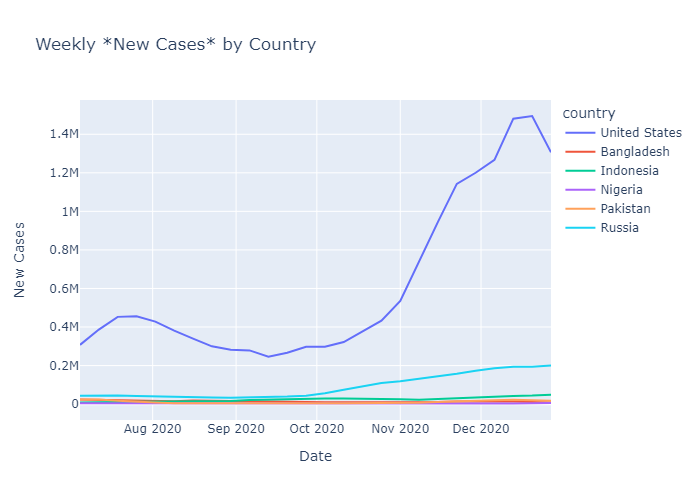

In [ ]:
# Create line plots for NEW cases and deaths for each country
fig = plt.line(merged_df, x='date', y='new_cases', color='country',
              labels={'date': 'Date', 'new_cases': 'New Cases'},
              title='Weekly *New Cases* by Country')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

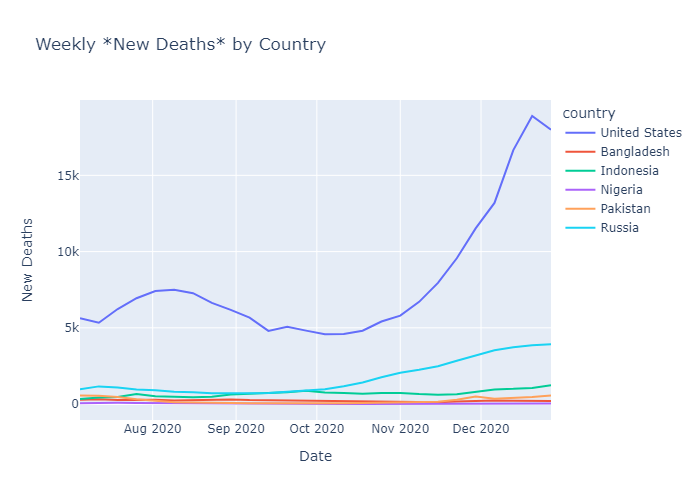

In [ ]:
fig = plt.line(merged_df, x='date', y='new_deaths', color='country',
              labels={'date': 'Date', 'new_deaths': 'New Deaths'},
              title='Weekly *New Deaths* by Country')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

#### This provides some different insights.
Looking at data for new cases and new deaths gives us a little more insight into the rate of change over time. We can see that the US had a bump in cases in July, followed by a slow decline into September. Finally, a large and steady increase from October through late December. A similar pattern can be seen for new deaths.
#### Analyzing US Trends
We know that COVID-19 has an incubation period of roughly one week. This means that changes in cases may lag a week or more behind policy changes or events that cause more spread. Another thing to keep in mind is that the United States' response to COVID was fairly decentralized, with some guidelines coming from the federal government, but most policies being enacted were at the State or local levels, meaning that pinpointing singular causes for trends is difficult, but we have some federal actions that we can look to.
<br><br>
Starting with an initial peak of new cases in late July, one possible explanation is the enaction of the "opening up America again" policy, enacted on April 16th, 2020. This policy urged businesses such as restaurants, movie theaters, and sports venues to reopen, as well as began the process of reopening schools and allowing non-essential travel to resume. Due to these measures, new cases increased. As the case numbers began rising, many states paused their reopening procedures and re-enacted some of their original COVID precautions, such as mask mandates or limits on numbers of employees and patrons in certain businesses. These precautions may have been helpful in seeing the case numbers start to decline again. 
<br><br>
Cases saw significant rises again around late October. A number of factors likely contributed to this. For example, US Presidential elections were held on Nov 4, meaning that throughout the tail end of election season, there was an increase in political gatherings. Also, holiday travel and gatherings for Halloween (Oct 31), Thanksgiving (Nov 26), and the December Holiday Season were likely big factors in the skyrocketing case numbers. It was also stated by healthcare workers in California that a common factor in a lot of their COVID patients was "COVID Fatigue." After almost a full year of living with COVID restrictions, people wanted their lives to return to normal, and may have been more lax in their precautions when visiting family and friends.
<br><br>
Looking at the COVID deaths data, we can see that the trends roughly follow those of the cases, but lag behind by a week or two. This makes sense intuitively, as a rise in cases would lead to a rise in deaths, assuming the disease has a relatively consistent death rate. 
#### Sources
[The predicted trend of COVID-19 in the United States of America under the policy of “Opening Up America Again”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8179840/) <br>
[Evolving trend change during the COVID-19 pandemic](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9531778/) <br>
[California's Covid-19 case surge is alarming](https://www.cnn.com/2020/12/18/us/california-covid-surge-alarming-rise/index.html)

#### Other country data
In our interactive plots, we can also remove countries from the graph to get a closer look at the trends in individual countries. However, since the raw numbers for the US are still much higher than that of the other countries, comparing the trends side by side is difficult. We will normalize the data by population in order to get a more comparative look.

### Weekly Trends Normalized - Linear

In [ ]:
# Normalize cumulative
df_normalized = merged_df.copy()
cols_to_norm = ['total_cases','total_deaths']
df_normalized[cols_to_norm] = df_normalized[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# Normalize new
df_new_normalized = merged_df.copy()
cols_to_norm_new = ['new_cases','new_deaths']
df_new_normalized[cols_to_norm_new] = df_new_normalized[cols_to_norm_new].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## Plot Data - Linear Normalization

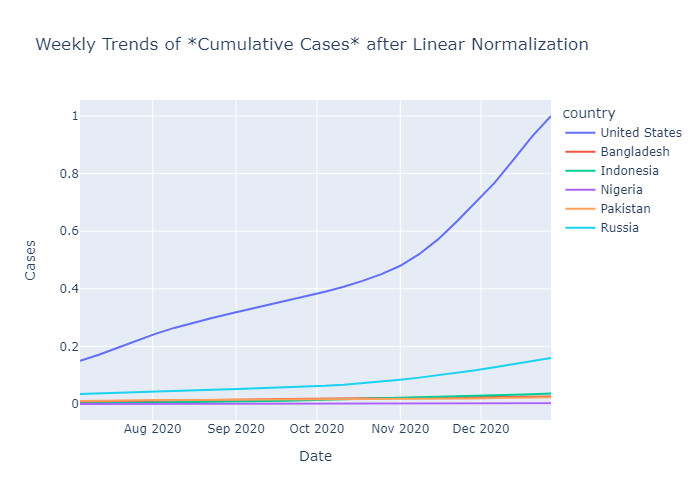

In [ ]:
fig = plt.line(df_normalized, x='date', y='total_cases', color='country',
              labels={'date': 'Date', 'total_cases': 'Cases'},
              title='Weekly Trends of *Cumulative Cases* after Linear Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

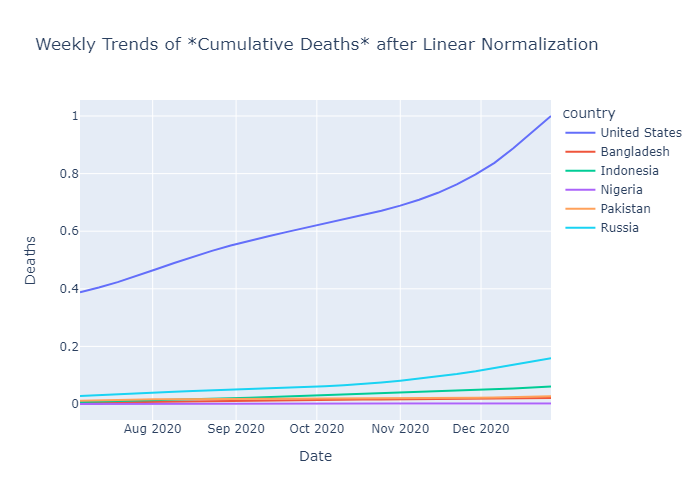

In [ ]:
fig = plt.line(df_normalized, x='date', y='total_deaths', color='country',
              labels={'date': 'Date', 'total_deaths': 'Deaths'},
              title='Weekly Trends of *Cumulative Deaths* after Linear Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

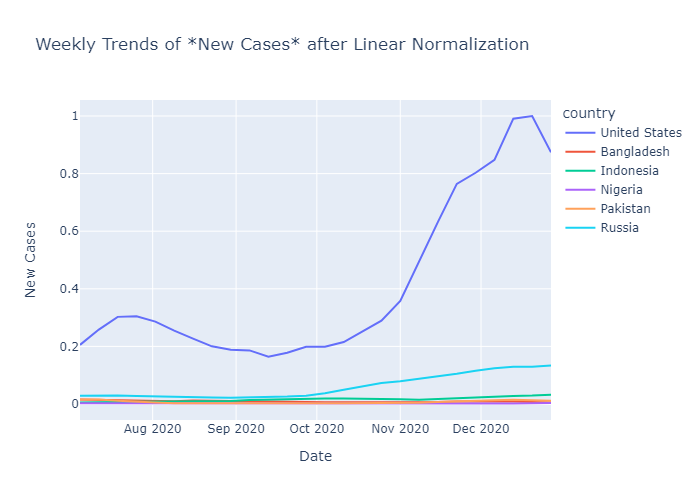

In [ ]:
fig = plt.line(df_new_normalized, x='date', y='new_cases', color='country',
              labels={'date': 'Date', 'new_cases': 'New Cases'},
              title='Weekly Trends of *New Cases* after Linear Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

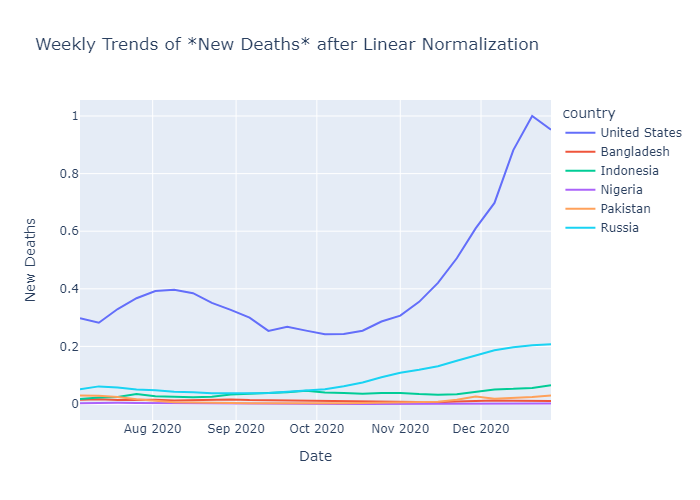

In [ ]:
fig = plt.line(df_new_normalized, x='date', y='new_deaths', color='country',
              labels={'date': 'Date', 'new_deaths': 'New Deaths'},
              title='Weekly Trends of *New Deaths* after Linear Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

#### Still not very useful.
We should account for relative population of each country, and use log normalization to see the relative differences easier.

### Weekly Trends Normalized Per 100,000 Population

In [ ]:
# Create a copy of our data to modify
popnorm = merged_df.copy()
# To calculate our value per 100,000 population, we will do the following calculation:
# value / (country_population / 100,000)
# Calculate normalized population by 100,000
pop_us = 336997632 /100000
pop_bangladesh = 169356240 /100000
pop_indonesia = 273753184 /100000
pop_nigeria = 213401328 /100000
pop_pakistan = 231402112 /100000
pop_russia = 145102752 /100000
# Add a column "norm_pop" to make calculations easier
popnorm.loc[popnorm['country'] == 'United States', 'norm_pop'] = pop_us
popnorm.loc[popnorm['country'] == 'Bangladesh', 'norm_pop'] = pop_bangladesh
popnorm.loc[popnorm['country'] == 'Indonesia', 'norm_pop'] = pop_indonesia
popnorm.loc[popnorm['country'] == 'Nigeria', 'norm_pop'] = pop_nigeria
popnorm.loc[popnorm['country'] == 'Pakistan', 'norm_pop'] = pop_pakistan
popnorm.loc[popnorm['country'] == 'Russia', 'norm_pop'] = pop_russia
# Normalize total cases, total deaths, new cases, and new deaths by 100,000 population
popnorm['total_cases'] = popnorm['total_cases'] / popnorm['norm_pop']
popnorm['total_deaths'] = popnorm['total_deaths'] / popnorm['norm_pop']
popnorm['new_cases'] = popnorm['new_cases'] / popnorm['norm_pop']
popnorm['new_deaths'] = popnorm['new_deaths'] / popnorm['norm_pop']
# Display data normalized by population
popnorm

,date,country,total_cases,total_deaths,new_cases,new_deaths,norm_pop
0,2020-07-05,United States,827.206406,38.100564,91.233579,1.670635,3369.97632
1,2020-07-12,United States,941.976352,39.681881,114.769946,1.581317,3369.97632
2,2020-07-19,United States,1076.311124,41.531152,134.334772,1.849271,3369.97632
3,2020-07-26,United States,1211.561629,43.590514,135.250505,2.059362,3369.97632
4,2020-08-02,United States,1338.644124,45.790826,127.082495,2.200312,3369.97632
...,...,...,...,...,...,...,...
151,2020-11-29,Russia,1509.403488,26.220040,119.135576,2.205334,1451.02752
152,2020-12-06,Russia,1637.864181,28.651421,128.460692,2.431380,1451.02752
153,2020-12-13,Russia,1771.328913,31.213054,133.464733,2.561633,1451.02752
154,2020-12-20,Russia,1904.595855,33.871170,133.266942,2.658116,1451.02752


## Plot Data - Normalized by 100,000 Population

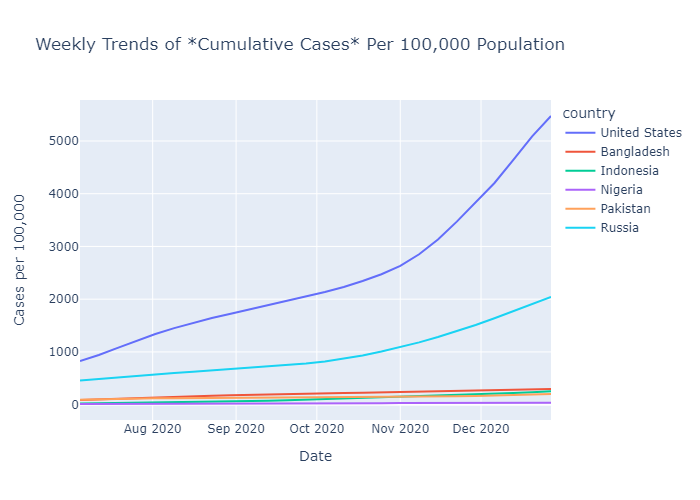

In [ ]:
fig = plt.line(popnorm, x='date', y='total_cases', color='country',
              labels={'date': 'Date', 'total_cases': 'Cases per 100,000'},
              title='Weekly Trends of *Cumulative Cases* Per 100,000 Population')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

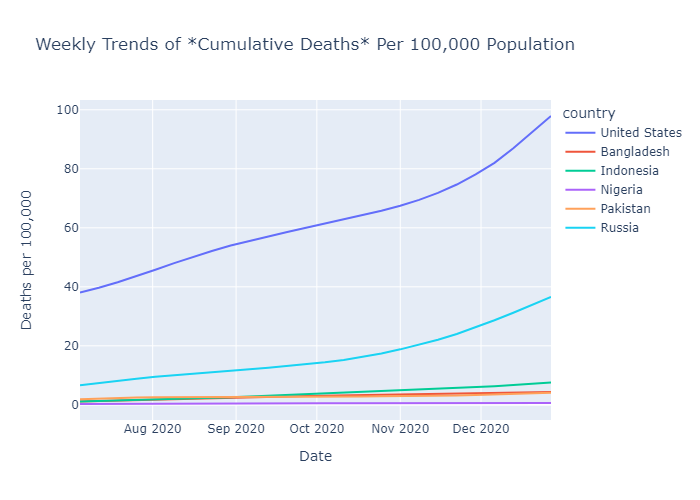

In [ ]:
fig = plt.line(popnorm, x='date', y='total_deaths', color='country',
              labels={'date': 'Date', 'total_deaths': 'Deaths per 100,000'},
              title='Weekly Trends of *Cumulative Deaths* Per 100,000 Population')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

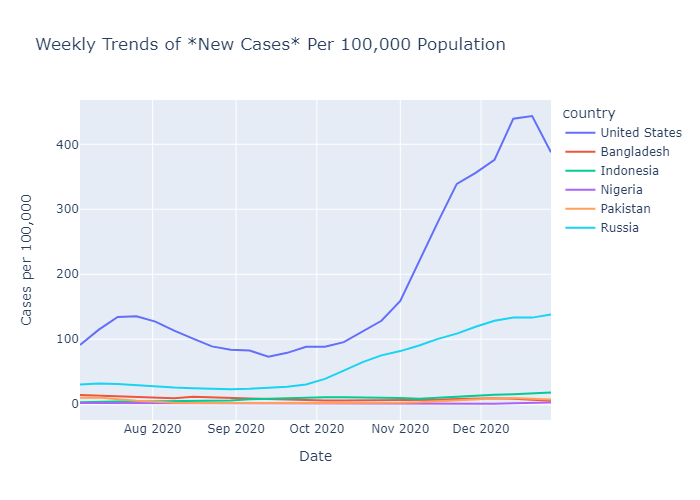

In [ ]:
fig = plt.line(popnorm, x='date', y='new_cases', color='country',
              labels={'date': 'Date', 'new_cases': 'Cases per 100,000'},
              title='Weekly Trends of *New Cases* Per 100,000 Population')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

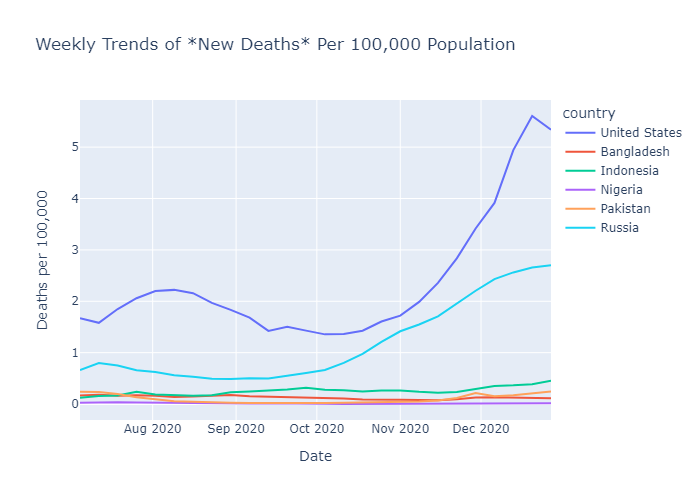

In [ ]:
fig = plt.line(popnorm, x='date', y='new_deaths', color='country',
              labels={'date': 'Date', 'new_deaths': 'Deaths per 100,000'},
              title='Weekly Trends of *New Deaths* Per 100,000 Population')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

### The US is still an outlier
After normalizing for population, we can see that the United States still has a much higher proportion of cases per 100,000 people than the other countries, with only Russia getting anywhere close. This tells us that the high raw case numbers in the US is not simply due to its higher population.
<br><br>
In order to make it easier to view relative differences between countries easier, we can use log normalization.

In [ ]:
# Perform log normalization
popnorm['total_cases'] = np.log10(popnorm['total_cases'])
popnorm['new_cases'] = np.log10(popnorm['new_cases'])
popnorm['total_deaths'] = np.log10(popnorm['total_deaths'])
popnorm['new_deaths'] = np.log10(popnorm['new_deaths'])
# Display final Normalized Data
popnorm

,date,country,total_cases,total_deaths,new_cases,new_deaths,norm_pop
0,2020-07-05,United States,2.917614,1.580931,1.960155,0.222882,3369.97632
1,2020-07-12,United States,2.974040,1.598592,2.059828,0.199019,3369.97632
2,2020-07-19,United States,3.031938,1.618374,2.128188,0.267001,3369.97632
3,2020-07-26,United States,3.083346,1.639392,2.131139,0.313733,3369.97632
4,2020-08-02,United States,3.126665,1.660778,2.104086,0.342484,3369.97632
...,...,...,...,...,...,...,...
151,2020-11-29,Russia,3.178805,1.418633,2.076041,0.343474,1451.02752
152,2020-12-06,Russia,3.214278,1.457146,2.108770,0.385853,1451.02752
153,2020-12-13,Russia,3.248299,1.494336,2.125367,0.408517,1451.02752
154,2020-12-20,Russia,3.279803,1.529830,2.124722,0.424574,1451.02752


## Plot Data - Log Normalized by 100,000 Population

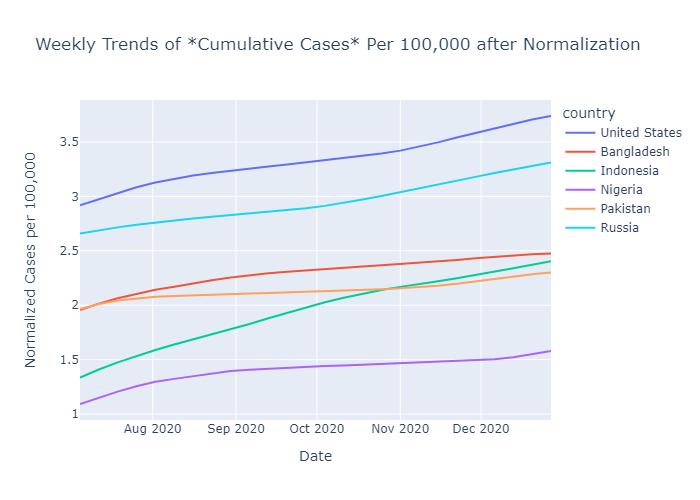

In [ ]:
fig = plt.line(popnorm, x='date', y='total_cases', color='country',
              labels={'date': 'Date', 'total_cases': 'Normalized Cases per 100,000'},
              title='Weekly Trends of *Cumulative Cases* Per 100,000 after Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

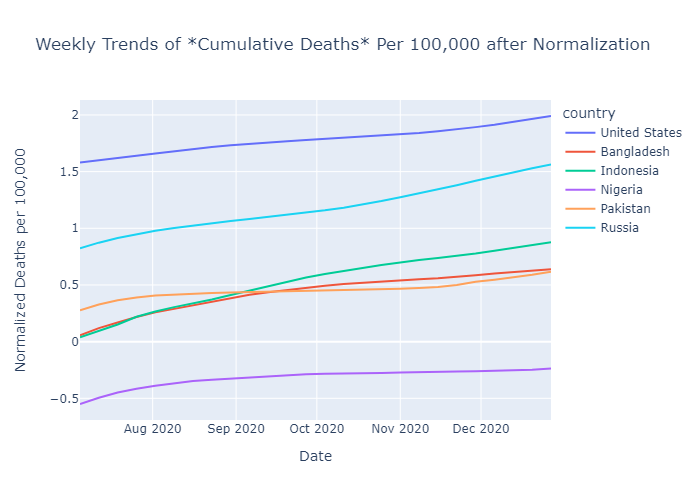

In [ ]:
fig = plt.line(popnorm, x='date', y='total_deaths', color='country',
              labels={'date': 'Date', 'total_deaths': 'Normalized Deaths per 100,000'},
              title='Weekly Trends of *Cumulative Deaths* Per 100,000 after Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

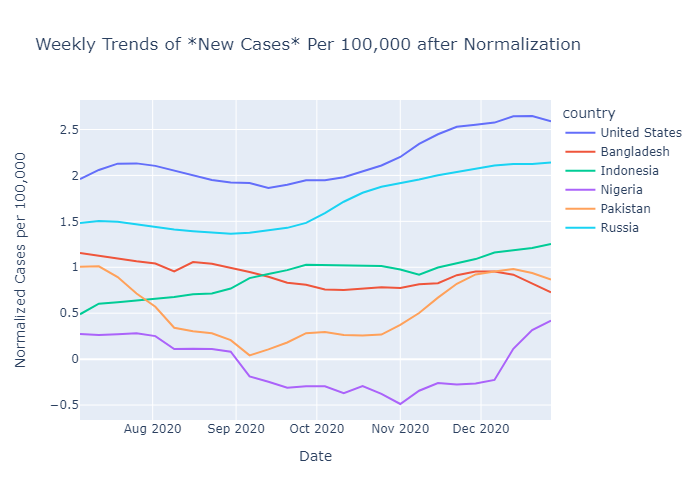

In [ ]:
fig = plt.line(popnorm, x='date', y='new_cases', color='country',
              labels={'date': 'Date', 'new_cases': 'Normalized Cases per 100,000'},
              title='Weekly Trends of *New Cases* Per 100,000 after Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

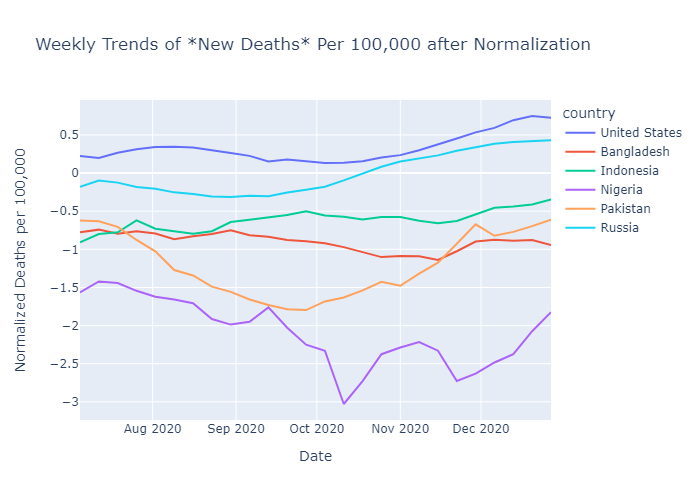

In [ ]:
fig = plt.line(popnorm, x='date', y='new_deaths', color='country',
              labels={'date': 'Date', 'new_deaths': 'Normalized Deaths per 100,000'},
              title='Weekly Trends of *New Deaths* Per 100,000 after Normalization')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

### Analysis of Final Normalized Plot
These final plots allow us to get a good look at the trends of each individual country, as well as how the trends compare to each other. We can easily see, for example, that Russia followed fairly similar trends to the United States, but with relatively lower numbers. 
<br><br>
Another observation from this plot is that Nigeria remained the lowest proportion of both cases and deaths over the entire date range. However, there is speculation as to the accuracy and completeness of this data. Nigeria has the lowest physician-to-population ratio in the world, and as a result there are likely relatively few tests being done compared to the other countries. 
<br><br>
Looking at Pakistan, we can see that they hit the next lowest proportional new cases. This is likely due to Pakistan's diligence in following the World Health Organization's guidelines, enacting decisive measures in testing, contact tracing, and public awareness campaigns. Unfortunately, despite these efforts, cases rose again near the end of the year, similar to the other countries in our dataset.
<br><br>
Bangladesh, uniquely, had a less severe rise in new cases in the later months than in the earlier months of the year. Bangladesh saw higher proportions of new cases at their peak in July than at the peak in December. This is likely because Bangladesh was slow to adopt proper testing and treatment measures at the start of the pandemic, due to lack of availability. This made their initial outbreak relatively worse compared to the second surge in the later months. 

#### Sources
[Nigeria’s race to zero COVID-19 cases: True disease burden or testing failure?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8364253/) <br>
[Pakistan's COVID-19 Prevention and Control Response Using the World Health Organization's Guidelines for Epidemic Response Interventions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9982052/#:~:text=The%20testing%20capacity%20also%20improved,COVID-19%20wards%20were%20established.)<br>
[Tackling the COVID-19 pandemic: The Bangladesh perspective](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7582102/#:~:text=To%20combat%20the%20COVID-19,and%20enforce%20social%20distancing%2C%20etc.)<br>